getting the Advection-Diffusion model to work

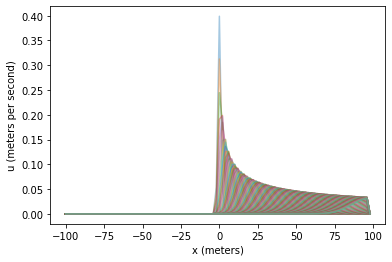

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

#constants
sigma = 1
mu = 0
v = 1
D = 1 #domain *make sure numerically stable
dt = .5 
S = 0 #source

#u is 2d array
dx = 2 #has to be bigger than dt for numerical stability
ts = 100
num_x = 200
ux = int(num_x/dx)
ut = int(ts/dt)
u = np.zeros((ut, ux))

xs = np.arange(ux)*dx - 100  #to set x-dimention to be -100:100
ts = np.arange(ts)*dt

#initialize
for i in range(ux):
         u[0][i] = (1 / (sigma * math.sqrt(2 * np.pi))) * math.exp((-(xs[i]-mu)**2) / (2 * sigma ** 2))

#set boundary condition
for i in range(1, ut):
    u[i][0] = 0
    u[i][-1] = 0

#run the model. Have to express uu^(n+1) in different terms
for i in range(1, ut):
    for j in range(1, ux-1):
        advection = -v * (u[i-1][j+1] - u[i-1][j-1]) / (2 * dx)
        diffusion = D * (u[i-1][j+1] - 2*u[i-1][j] + u[i-1][j-1]) / dx ** 2
        u[i][j] = u[i-1][j] + (advection + diffusion + S)*dt

#plot
for i in u:
    plt.plot(xs, i, alpha = .4) 

plt.xlabel("x (meters)")
plt.ylabel("u (meters per second)")
plt.show()

Now, I'm gonna make the domain smaller to show numerical instability

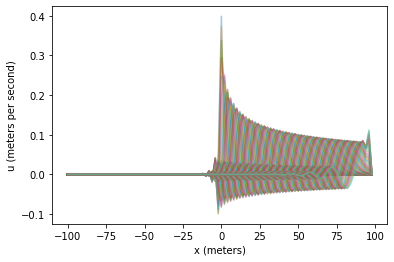

In [28]:

D = .3

#initialize
for i in range(ux):
         u[0][i] = (1 / (sigma * math.sqrt(2 * np.pi))) * math.exp((-(xs[i]-mu)**2) / (2 * sigma ** 2))

#set boundary condition
for i in range(1, ut):
    u[i][0] = 0
    u[i][-1] = 0

#run the model
for i in range(1, ut):
    for j in range(1, ux-1):
        advection = -v * (u[i-1][j+1] - u[i-1][j-1]) / (2 * dx)
        diffusion = D * (u[i-1][j+1] - 2*u[i-1][j] + u[i-1][j-1]) / dx ** 2
        u[i][j] = u[i-1][j] + (advection + diffusion + S)*dt

#plot
for i in u:
    plt.plot(xs, i, alpha = .4) 

plt.xlabel("x (meters)")
plt.ylabel("u (meters per second)")
plt.show()

That became unstable in a different way than I expected! Now I'll try a different numerically unstable solution:

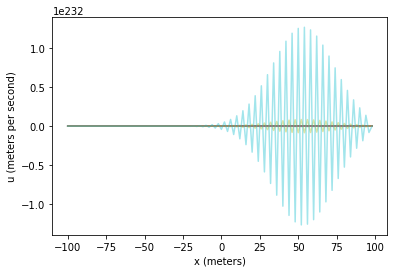

In [29]:
#set domain back
D = 1
#make dx > dt
dx = .5
dt = 1

#initialize
for i in range(ux):
         u[0][i] = (1 / (sigma * math.sqrt(2 * np.pi))) * math.exp((-(xs[i]-mu)**2) / (2 * sigma ** 2))

#set boundary condition
for i in range(1, ut):
    u[i][0] = 0
    u[i][-1] = 0

#run the model
for i in range(1, ut):
    for j in range(1, ux-1):
        advection = -v * (u[i-1][j+1] - u[i-1][j-1]) / (2 * dx)
        diffusion = D * (u[i-1][j+1] - 2*u[i-1][j] + u[i-1][j-1]) / dx ** 2
        u[i][j] = u[i-1][j] + (advection + diffusion + S)*dt

#plot
for i in u:
    plt.plot(xs, i, alpha = .4) 

plt.xlabel("x (meters)")
plt.ylabel("u (meters per second)")
plt.show()

Now, I want to see what happens when the boundary condition is changed

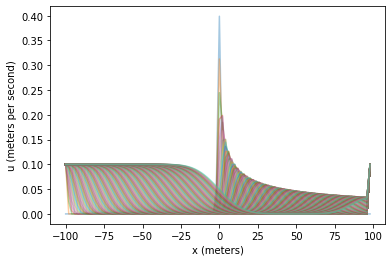

In [30]:
#change things back 
dx = 2
dt = .5

#initialize
for i in range(ux):
         u[0][i] = (1 / (sigma * math.sqrt(2 * np.pi))) * math.exp((-(xs[i]-mu)**2) / (2 * sigma ** 2))

#set boundary condition, it is now non-zero
for i in range(1, ut):
    u[i][0] = .1
    u[i][-1] = .1

#run the model
for i in range(1, ut):
    for j in range(1, ux-1):
        advection = -v * (u[i-1][j+1] - u[i-1][j-1]) / (2 * dx)
        diffusion = D * (u[i-1][j+1] - 2*u[i-1][j] + u[i-1][j-1]) / dx ** 2
        u[i][j] = u[i-1][j] + (advection + diffusion + S)*dt

#plot
for i in u:
    plt.plot(xs, i, alpha = .4) 

plt.xlabel("x (meters)")
plt.ylabel("u (meters per second)")
plt.show()

even a tiny difference in the boundary condition changed the diffusion 